In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
caloria=pd.read_csv('/content/drive/MyDrive/clases data science/train.csv')

explora los datos

In [6]:
caloria.info()
caloria.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
5,5,female,26,156.0,56.0,19.0,100.0,40.5,103.0
6,6,female,21,172.0,73.0,3.0,81.0,38.3,9.0
7,7,male,46,188.0,94.0,23.0,100.0,40.8,145.0
8,8,female,33,166.0,63.0,25.0,107.0,40.5,161.0
9,9,male,65,185.0,88.0,23.0,104.0,41.0,185.0


COLUMNA "SEX" CON DATOS DE TIPO CATEGORICAS

In [7]:
caloria.isnull().sum()

,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


SIN DATOS NULOS

In [8]:
for col in caloria.select_dtypes(include=['object']).columns:
    print(col, caloria[col].nunique())

Sex 2


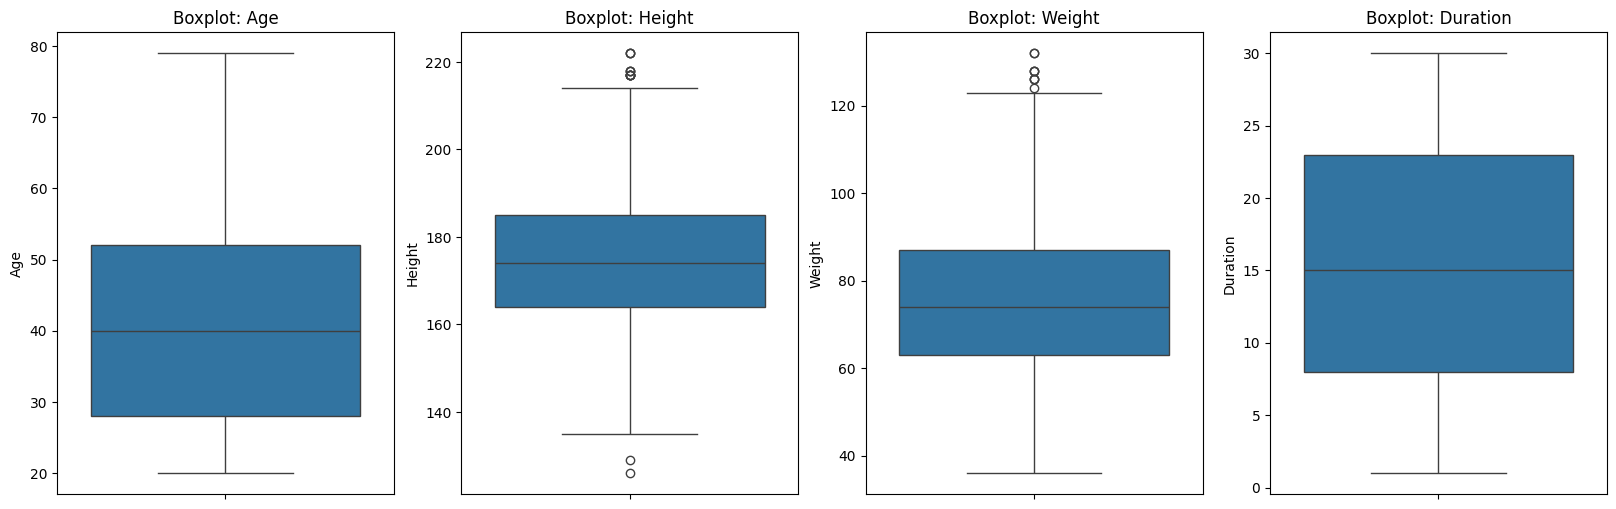

In [9]:
# boxplot para cada variable del dataset
numeric_columns=['Age','Height','Weight','Duration']
fig, axs = plt.subplots(1, 4, figsize=(20,6))
for i, ax in enumerate(axs.flatten()):
    if i < len(numeric_columns):
        ax.set_title("Boxplot: " + f'{numeric_columns[i]}')
        sns.boxplot(caloria[numeric_columns[i]], ax=ax)
    else:
        ax.set_visible(False)
plt.show()

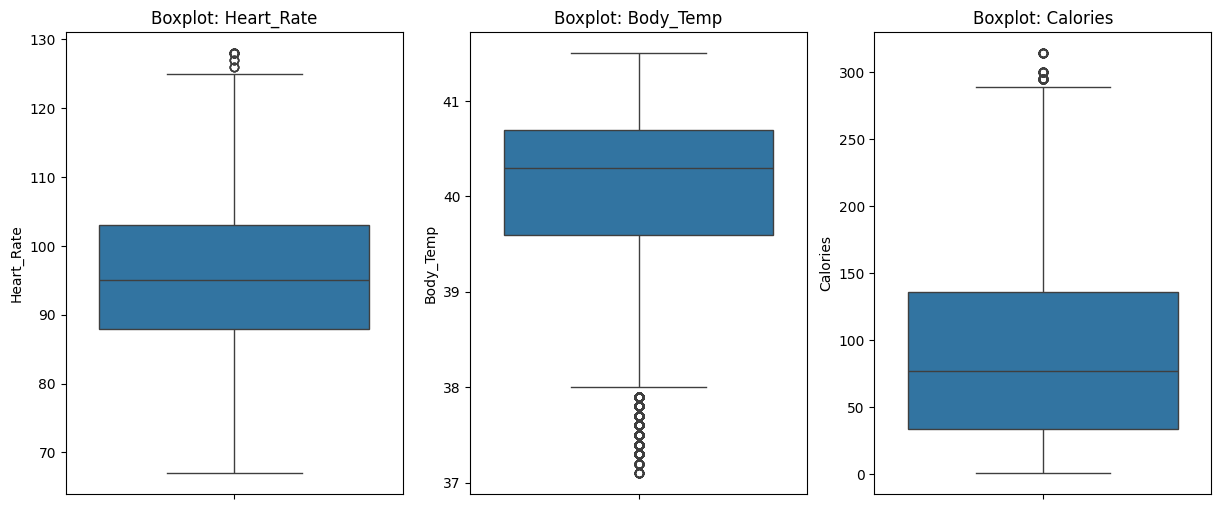

In [10]:
# boxplot para cada variable del dataset
numeric_columns=['Heart_Rate','Body_Temp','Calories']
fig, axs = plt.subplots(1, 4, figsize=(20,6))
for i, ax in enumerate(axs.flatten()):
    if i < len(numeric_columns):
        ax.set_title("Boxplot: " + f'{numeric_columns[i]}')
        sns.boxplot(caloria[numeric_columns[i]], ax=ax)
    else:
        ax.set_visible(False)
plt.show()

Preprocesamiento de datos

In [11]:
caloria['Calories'].describe()

,Calories
count,750000.000000
mean,88.282781
std,62.395349
min,1.000000
25%,34.000000
50%,77.000000
75%,136.000000
max,314.000000


variables categorias
Femenino=0; Masculino=1

In [12]:
caloria['Sex'] = caloria['Sex'].map({'female': 0, 'male': 1})
display(caloria.head())

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,1,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,0,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,0,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,1,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,0,38,166.0,61.0,25.0,102.0,40.6,146.0


In [13]:
%pip install category_encoders

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor
import category_encoders as ce

In [15]:
y=caloria['Calories']
X=caloria.drop('Calories',axis=1)

In [16]:
#Entrenamiento y evaluación

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor


In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.svm import SVR # Keep the original import at the top
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

DT = DecisionTreeRegressor(random_state=42)
Bagging = BaggingRegressor(random_state=42, n_estimators=10, n_jobs=-1) # revisar n estimators (10 por defecto)
RF = RandomForestRegressor(random_state=42,  max_features="sqrt",max_depth=20, min_samples_split=5, n_estimators=100, n_jobs=-1)
AB = AdaBoostRegressor(random_state=42, n_estimators=10, learning_rate=0.05) # revisar n estimators (10 por defecto) Learning -> velocidad de  aprendizaje
from sklearn.svm import SVR # Add a local import to ensure SVR is the class
SVR_model = SVR(kernel="rbf", C=10.0, gamma="scale", epsilon=0.1) # Renamed SVR to SVR_model
ET = ExtraTreesRegressor(random_state=42, n_estimators=100, n_jobs=-1, max_features="sqrt")
XGB = XGBRegressor(
        n_estimators=50,
        learning_rate=0.05,
        max_depth=7,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=42,
        tree_method="hist",
        eval_metric="rmse",
        n_jobs=-1
    )
Linear = LinearRegression(n_jobs=None)
GB = GradientBoostingRegressor(random_state=42, n_estimators=600, learning_rate=0.05, max_depth=3)

models = {
    "DT": DT,
    "Bagging": Bagging,
    "RF": RF,
    "AB": AB,
    "SVR": SVR_model, # Updated the dictionary to use SVR_model
    "ET": ET,
    "XGB": XGB,
    "Linear": Linear,
    "GB": GB
}

In [21]:
# ===== Funciones de métricas =====
def safe_mape(y_true, y_pred, eps=1e-8):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = np.where(np.abs(y_true) < eps, eps, np.abs(y_true))
    return np.mean(np.abs(y_true - y_pred) / denom) * 100

def smape(y_true, y_pred, eps=1e-8):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = np.maximum(eps, (np.abs(y_true) + np.abs(y_pred)) / 2.0)
    return np.mean(np.abs(y_pred - y_true) / denom) * 100

valores predecidos: [194.  67.  42. ...  35.  37. 163.]


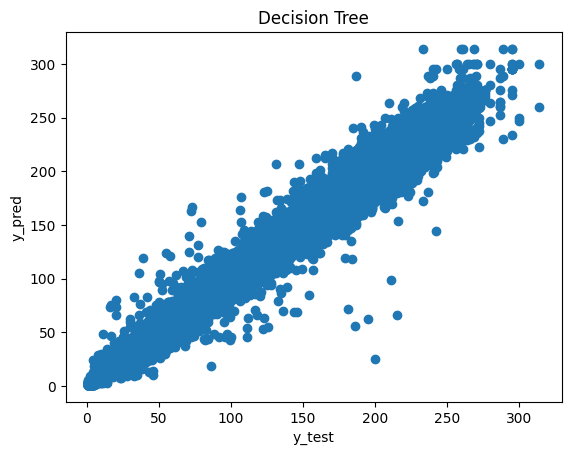

Decision Tree
MSE: 26.8091
MAE: 3.15282
R2: 0.9930826215770704
SMAPE: 5.170505108209608
MAPE: 5.266862141609035
rmse = 5.177750476799746


In [36]:
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(f"valores predecidos: {y_pred}")
plt.scatter(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Decision Tree")
plt.show()
print("Decision Tree")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")
print(f"SMAPE: {smape(y_test, y_pred)}")
print(f"MAPE: {safe_mape(y_test, y_pred)}")
print(f"rmse = {np.sqrt(mean_squared_error(y_test, y_pred))}")


In [25]:
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

valores predecidos: [196.47532102  65.62874209  41.36502653 ...  34.52333229  36.43115498
 169.14839917]


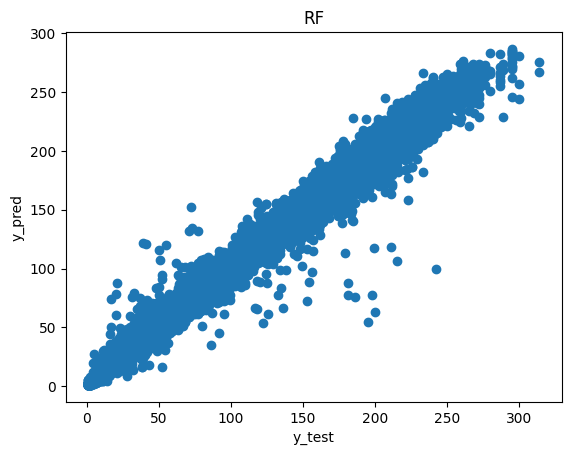

RT
MSE: 15.037269318058074
MAE: 2.3313066519433714
R2: 0.9961200307984783
SMAPE: 3.947349329838338
MAPE: 4.118761872937902
rmse = 3.8777918095300157


In [35]:
print(f"valores predecidos: {y_pred_RF}")
plt.scatter(y_test, y_pred_RF)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("RF")
plt.show()
print("RT")
print(f"MSE: {mean_squared_error(y_test, y_pred_RF)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_RF)}")
print(f"R2: {r2_score(y_test, y_pred_RF)}")
print(f"SMAPE: {smape(y_test, y_pred_RF)}")
print(f"MAPE: {safe_mape(y_test, y_pred_RF)}")
print(f"rmse = {np.sqrt(mean_squared_error(y_test, y_pred_RF))}")

valores predecidos: [200.54749599  59.85182524  36.87620813 ...  36.87620813  36.87620813
 200.54749599]


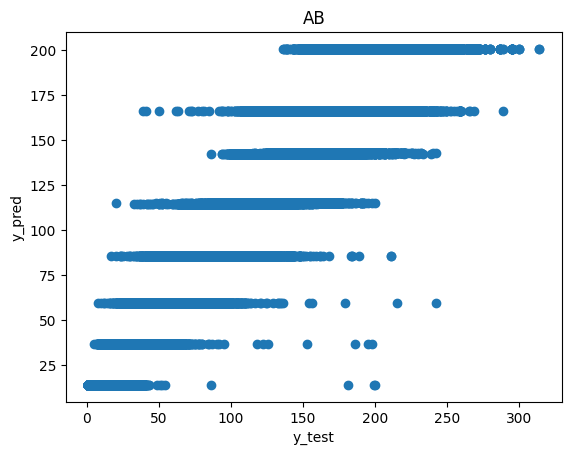

AB
MSE: 266.64466908612536
MAE: 11.888321668431695
R2: 0.9311994031681199
SMAPE: 20.636712266878956
MAPE: 27.69134503875342
rmse = 16.32925806906503


In [37]:
AB.fit(X_train, y_train)
y_pred_AB = AB.predict(X_test)
print(f"valores predecidos: {y_pred_AB}")
plt.scatter(y_test, y_pred_AB)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("AB")
plt.show()
print("AB")
print(f"MSE: {mean_squared_error(y_test, y_pred_AB)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_AB)}")
print(f"R2: {r2_score(y_test, y_pred_AB)}")
print(f"SMAPE: {smape(y_test, y_pred_AB)}")
print(f"MAPE: {safe_mape(y_test, y_pred_AB)}")
print(f"rmse = {np.sqrt(mean_squared_error(y_test, y_pred_AB))}")

In [31]:
XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)

valores predecidos: [188.72467   68.56878   45.006245 ...  37.626526  41.51961  167.02531 ]


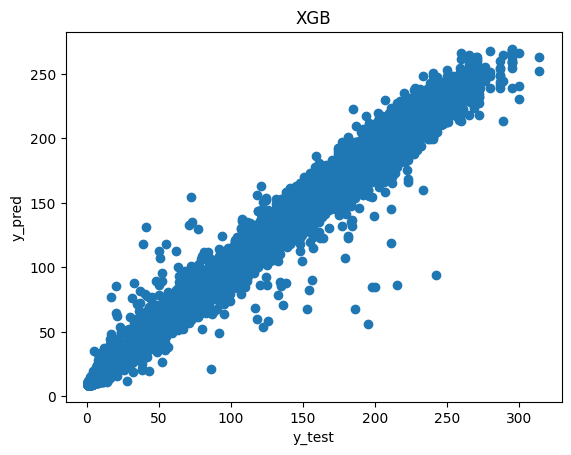

XGB
MSE: 44.43183685593866
MAE: 5.110452596486409
R2: 0.9885355409335488
SMAPE: 13.070166511546185
MAPE: 18.45572631033364
rmse = 6.665721030461645


In [38]:
print(f"valores predecidos: {y_pred_XGB}")
plt.scatter(y_test, y_pred_XGB)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("XGB")
plt.show()
print("XGB")
print(f"MSE: {mean_squared_error(y_test, y_pred_XGB)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_XGB)}")
print(f"R2: {r2_score(y_test, y_pred_XGB)}")
print(f"SMAPE: {smape(y_test, y_pred_XGB)}")
print(f"MAPE: {safe_mape(y_test, y_pred_XGB)}")
print(f"rmse = {np.sqrt(mean_squared_error(y_test, y_pred_XGB))}")

EL modelo que presentó una mejor tasa de predicción teniendo en cuenta el R^2:0.996, MSE 15.03 y RMSE:3.87  es RF (Random Forest)

Feature Importances (Random Forest):
Duration      0.473860
Body_Temp     0.246780
Heart_Rate    0.243912
Age           0.024674
Weight        0.004506
Height        0.002445
Sex           0.002365
id            0.001457
dtype: float64


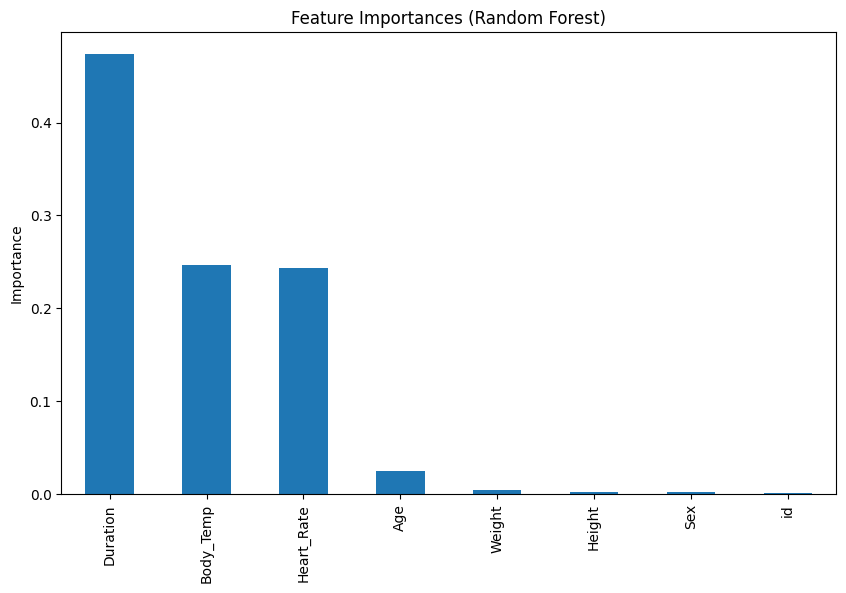

In [40]:
# vamos a revisar las variables con mayor importacia o relevancia para determinar el gasto calorico dentro del modelo de regresión
feature_importances = RF.feature_importances_
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)
print("Feature Importances (Random Forest):")
print(sorted_feature_importances)
#visualización de cad categoria por importancia dentro del modelo
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances (Random Forest)')
plt.ylabel('Importance')
plt.show()

De los 3 modelos evaluados el que presentó mejor rendimiento de predicción fue random forest, el valor de regresión fue cercano uno, el RMSE fue de aprox. 3 lo cual indica que la diferencia promedio entre los valores reales y predichos es muy baja.Adicionalmente, el valor de MAE es el mas bajo dentro de los 3 modelos, asi mismo, tomando en cuenta las distintas variables, se determina que la que presenta mayor relevancia para predecir el gasto o cantidad de calorias quemadas es el tiempo de duración de una actividad fisica.

Este modelo podría tener una aplicación en las ciencias del desporte o de salud. Podria ser implementado en una rutina de ejercicio para tener claridad de cuanto tiempo o que cantidad de calorias quemaré en una rutina, claramente habria que incluir o tener en cuenta el tipo de ejercicio, pero para esto se necesitaria una evaluación más exhaustiva o con unas variables adicional.  